In [ ]:

clave <- "X198090"  # Clave con prefijo X si R la convierte automáticamente

# Leer el archivo asegurando formato correcto
muestra_total1 <- read.table("tarea21.dat", header = TRUE, fill = TRUE, na.strings = "NA")

# Extraer la muestra correspondiente a la clave
muestra1 <- muestra_total1[[clave]]
muestra1 <- as.numeric(na.omit(muestra1))  # Convertir a numérico y eliminar NAs
n <- length(muestra1)

## Pregunta 1: Estimadores de theta
### Método de Momentos

In [ ]:

theta_mom <- min(muestra1)  # Estimador por método de momentos

# Método de Máxima Verosimilitud
theta_mv <- min(muestra1)   # Estimador por máxima verosimilitud

cat("Estimador método de momentos (theta_mom):", theta_mom, "\n")
cat("Estimador máxima verosimilitud (theta_mv):", theta_mv, "\n")

Estimador método de momentos (theta_mom): -0.9199078 
Estimador máxima verosimilitud (theta_mv): -0.9199078 


## Pregunta 2: Máxima verosimilitud para Normal
### Cargar los datos de tarea22.dat

In [ ]:

muestra_total2 <- read.table("tarea22.dat", header = TRUE, fill = TRUE, na.strings = "NA")

if (!(clave %in% colnames(muestra_total2))) {
  stop("Clave no encontrada en los datos de tarea22.dat")
}

# Extraer la muestra correspondiente a la clave
muestra2 <- muestra_total2[[clave]]
muestra2 <- as.numeric(na.omit(muestra2))  # Convertir a numérico y eliminar NAs
n2 <- length(muestra2)

if (n2 == 0) {
  stop("No se encontraron valores numéricos para la clave en tarea22.dat")
}

# Estimadores de máxima verosimilitud
mu_hat <- mean(muestra2)
sigma2_hat <- var(muestra2) * (n2 - 1) / n2  # MLE para sigma^2

In [14]:

# Matriz Hessiana (segunda derivada de la log-verosimilitud)
H <- matrix(c(-n2/sigma2_hat, 0, 0, -n2/(2*sigma2_hat^2)), nrow=2)

# Verificamos si la matriz Hessiana es definida negativa
es_def_neg <- all(eigen(H)$values < 0)

cat("Estimador de máxima verosimilitud para mu:", mu_hat, "\n")
cat("Estimador de máxima verosimilitud para sigma^2:", sigma2_hat, "\n")
cat("La matriz Hessiana es definida negativa:", es_def_neg, "\n")

Estimador de máxima verosimilitud para mu: 1.415389 
Estimador de máxima verosimilitud para sigma^2: 0.8942962 
La matriz Hessiana es definida negativa: TRUE 


## Pregunta 3: Estimadores de máxima verosimilitud

### Ordenamos la muestra

In [ ]:

muestra_ordenada <- sort(muestra2)
n_muestra <- length(muestra2)
X1 <- muestra_ordenada[1]  # Mínimo de la muestra
Xn <- muestra_ordenada[n_muestra]  # Máximo de la muestra

# Cálculo de los estimadores de máxima verosimilitud
mu_mv <- (X1 + Xn) / 2
sigma_mv <- (Xn - X1) / (2 * sqrt(3))

cat("Estimador de máxima verosimilitud para mu:", mu_mv, "\n")
cat("Estimador de máxima verosimilitud para sigma:", sigma_mv, "\n")


# Simulación de N=5000 muestras para validar la distribución de los estimadores
set.seed(123)
N <- 5000  # Número de simulaciones
sim_mu_mv <- numeric(N)
sim_sigma_mv <- numeric(N)

for (i in 1:N) {
  muestra_sim <- sample(muestra2, size = n_muestra, replace = TRUE)  # Bootstrap
  muestra_ordenada <- sort(muestra_sim)
  X1 <- muestra_ordenada[1]
  Xn <- muestra_ordenada[n_muestra]
  
  # Estimadores de máxima verosimilitud
  sim_mu_mv[i] <- (X1 + Xn) / 2
  sim_sigma_mv[i] <- (Xn - X1) / (2 * sqrt(3))
}

# Análisis de la distribución de los estimadores
cat("Media de mu estimado:", mean(sim_mu_mv), "\n")
cat("Varianza de mu estimado:", var(sim_mu_mv), "\n")
cat("Media de sigma estimado:", mean(sim_sigma_mv), "\n")
cat("Varianza de sigma estimado:", var(sim_sigma_mv), "\n")


Estimador de máxima verosimilitud para mu: 2.32797 
Estimador de máxima verosimilitud para sigma: 1.106696 


Media de mu estimado: 2.241126 
Varianza de mu estimado: 0.03644516 
Media de sigma estimado: 1.037116 
Varianza de sigma estimado: 0.01203285 


## Pregunta 4: Estimadores de momentos y máxima verosimilitud para la distribución gamma


Estimador de momentos alpha_mom: 2.176113 
Estimador de momentos lambda_mom: 1.537466 
Estimador de máxima verosimilitud alpha_mv: 2.890545 
Estimador de máxima verosimilitud lambda_mv: 2.042225 


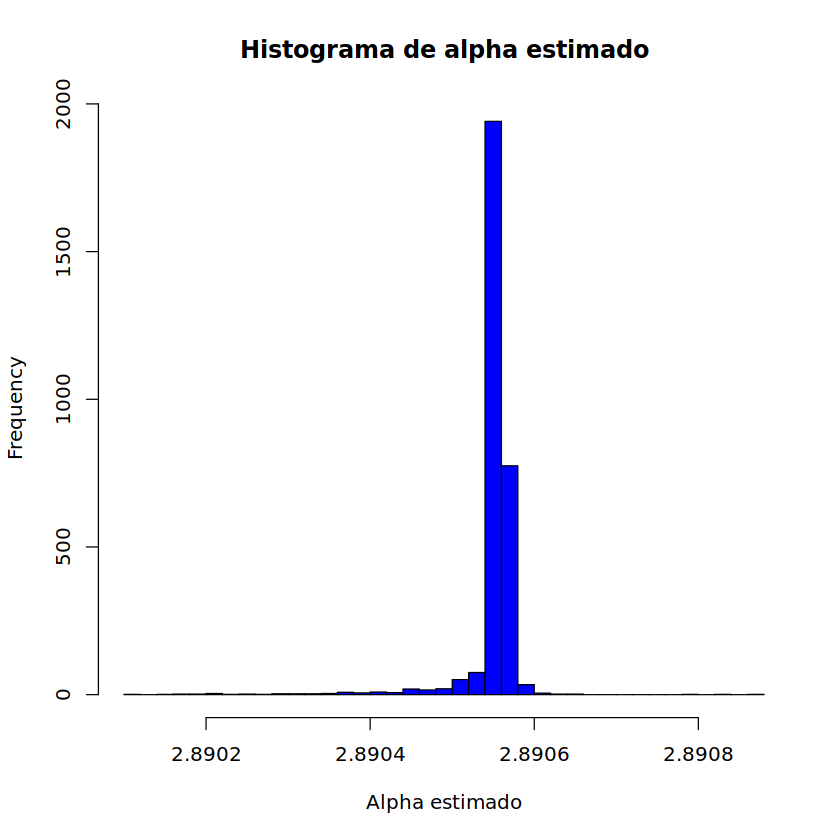

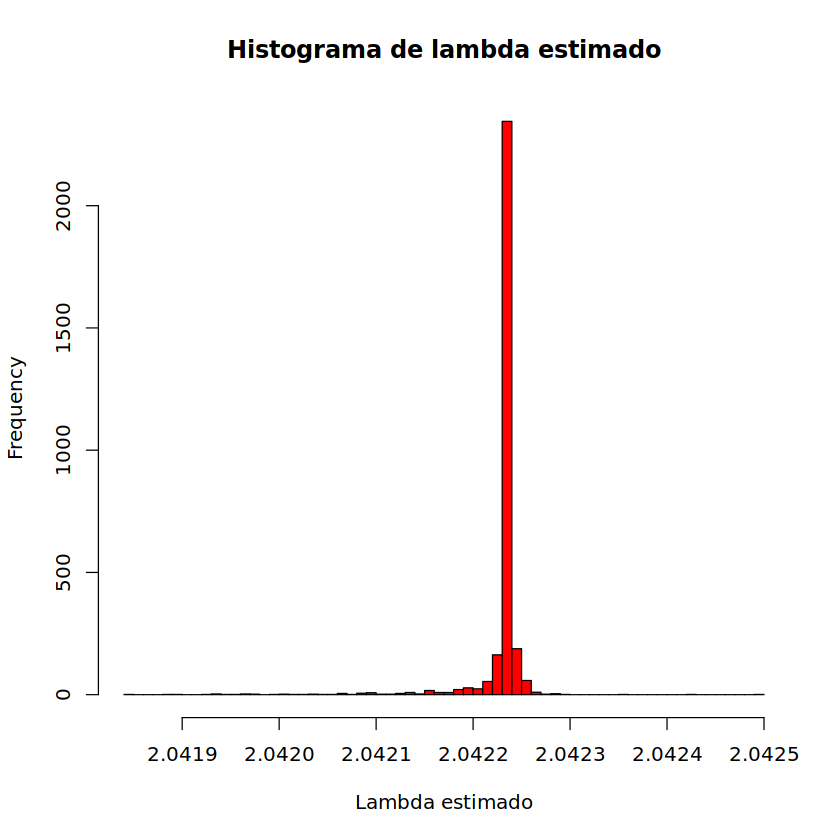

In [ ]:

# Inciso (a): Estimadores de método de momentos para la distribución Gamma
alpha_mom <- (mean(muestra2)^2) / var(muestra2)
lambda_mom <- mean(muestra2) / var(muestra2)
cat("Estimador de momentos alpha_mom:", alpha_mom, "\n")
cat("Estimador de momentos lambda_mom:", lambda_mom, "\n")

# Inciso (b): Estimadores de máxima verosimilitud para la distribución Gamma
log_verosimilitud <- function(params) {
  alpha <- params[1]
  lambda <- params[2]
  if (alpha <= 0 || lambda <= 0 || !is.finite(alpha) || !is.finite(lambda)) return(Inf)
  likelihood_values <- dgamma(muestra2, shape = alpha, rate = lambda, log = TRUE)
  if (any(!is.finite(likelihood_values))) return(Inf)
  -sum(likelihood_values)
}
resultado <- optim(par = c(max(0.1, alpha_mom), max(0.1, lambda_mom)), fn = log_verosimilitud, method = "L-BFGS-B", lower = c(0.01, 0.01))
alpha_mv <- resultado$par[1]
lambda_mv <- resultado$par[2]
cat("Estimador de máxima verosimilitud alpha_mv:", alpha_mv, "\n")
cat("Estimador de máxima verosimilitud lambda_mv:", lambda_mv, "\n")

# Inciso (c): Simulación de N=3000 muestras y estimación de parámetros
set.seed(123)
N <- 3000
sim_alpha_mv <- numeric(N)
sim_lambda_mv <- numeric(N)
for (i in 1:N) {
  sim_muestra <- rgamma(length(muestra2), shape = alpha_mv, rate = lambda_mv)
  resultado <- optim(par = c(runif(1, 0.5 * alpha_mv, 1.5 * alpha_mv), runif(1, 0.5 * lambda_mv, 1.5 * lambda_mv)), fn = log_verosimilitud, method = "L-BFGS-B", lower = c(0.01, 0.01))
  sim_alpha_mv[i] <- resultado$par[1]
  sim_lambda_mv[i] <- resultado$par[2]
}

# Inciso (d): Histogramas de los valores estimados de alpha y lambda
hist(sim_alpha_mv, main = "Histograma de alpha estimado", xlab = "Alpha estimado", col = "blue", breaks = 50)
hist(sim_lambda_mv, main = "Histograma de lambda estimado", xlab = "Lambda estimado", col = "red", breaks = 50)

#### Pregunta 5: 

Estimador método de momentos (theta_mom): -0.9199078 
Estimador máxima verosimilitud (theta_mv): -0.9199078 
Estimador de máxima verosimilitud para mu: 1.415389 
Estimador de máxima verosimilitud para sigma^2: 0.8942962 
La matriz Hessiana es definida negativa: TRUE 
Estimador de máxima verosimilitud para mu: 2.32797 
Estimador de máxima verosimilitud para sigma: 1.106696 
Estimador de momentos alpha_mom: 2.176113 
Estimador de momentos lambda_mom: 1.537466 
Estimador de máxima verosimilitud alpha_mv: 2.890545 
Estimador de máxima verosimilitud lambda_mv: 2.042225 


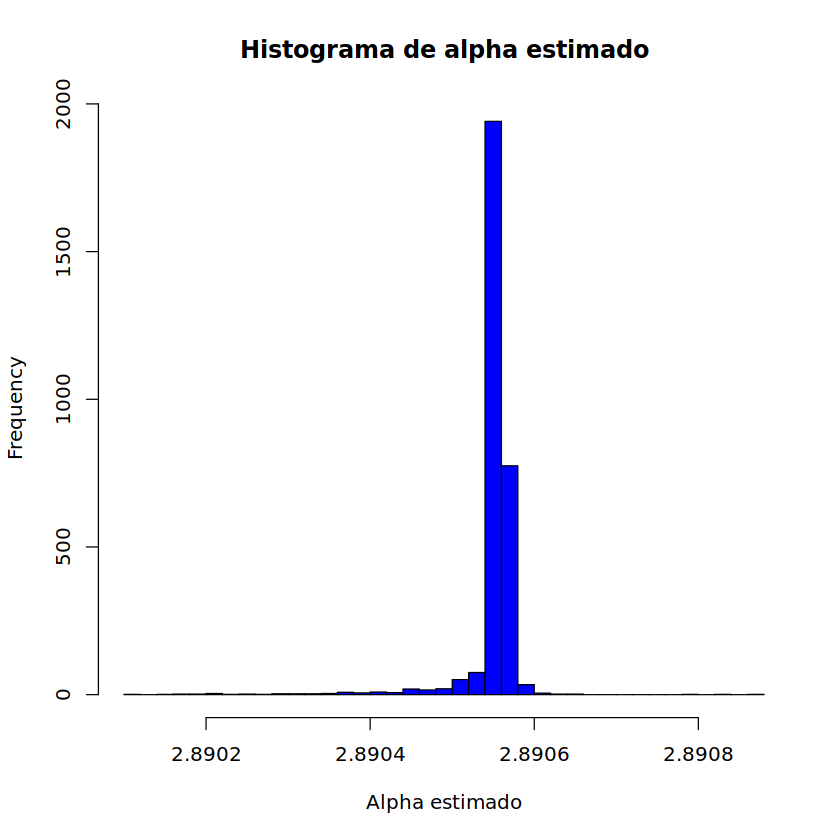

ERROR: Error in optim(par = runif(1, 0.2, 0.8), fn = log_likelihood, method = "L-BFGS-B", : L-BFGS-B needs finite values of 'fn'


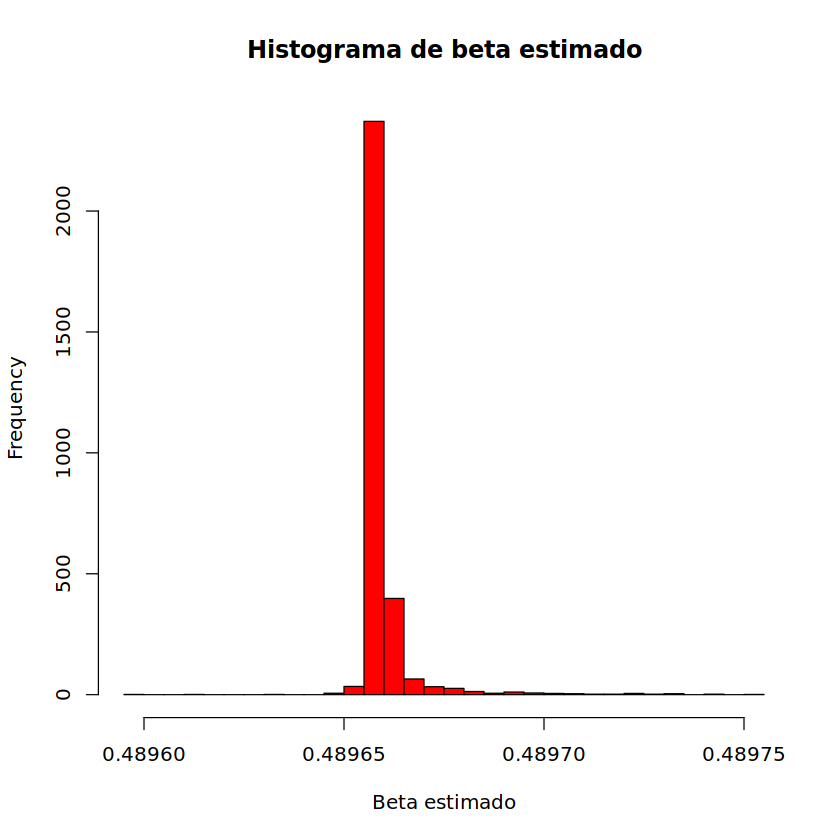

In [ ]:


# Inciso (a): Estimadores de método de momentos y máxima verosimilitud para theta (Uniforme)
theta_mom <- min(muestra1)
theta_mv <- min(muestra1)
cat("Estimador método de momentos (theta_mom):", theta_mom, "\n")
cat("Estimador máxima verosimilitud (theta_mv):", theta_mv, "\n")

# Inciso (b): Estimadores de máxima verosimilitud para Normal
mu_hat <- mean(muestra2)
sigma2_hat <- var(muestra2) * (n2 - 1) / n2
H <- matrix(c(-n2/sigma2_hat, 0, 0, -n2/(2*sigma2_hat^2)), nrow=2)
es_def_neg <- all(eigen(H)$values < 0)
cat("Estimador de máxima verosimilitud para mu:", mu_hat, "\n")
cat("Estimador de máxima verosimilitud para sigma^2:", sigma2_hat, "\n")
cat("La matriz Hessiana es definida negativa:", es_def_neg, "\n")

# Inciso (c): Estimadores de máxima verosimilitud basados en valores extremos
muestra_ordenada <- sort(muestra2)
X1 <- muestra_ordenada[1]
Xn <- muestra_ordenada[n2]
mu_mv <- (X1 + Xn) / 2
sigma_mv <- (Xn - X1) / (2 * sqrt(3))
cat("Estimador de máxima verosimilitud para mu:", mu_mv, "\n")
cat("Estimador de máxima verosimilitud para sigma:", sigma_mv, "\n")

# Inciso (d): Estimadores de momentos y máxima verosimilitud para la distribución gamma
alpha_mom <- (mean(muestra2)^2) / var(muestra2)
lambda_mom <- mean(muestra2) / var(muestra2)
cat("Estimador de momentos alpha_mom:", alpha_mom, "\n")
cat("Estimador de momentos lambda_mom:", lambda_mom, "\n")
log_verosimilitud <- function(params) {
  alpha <- params[1]
  lambda <- params[2]
  if (alpha <= 0 || lambda <= 0 || !is.finite(alpha) || !is.finite(lambda)) return(Inf)
  likelihood_values <- dgamma(muestra2, shape = alpha, rate = lambda, log = TRUE)
  if (any(!is.finite(likelihood_values))) return(Inf)
  -sum(likelihood_values)
}
resultado <- optim(par = c(max(0.1, alpha_mom), max(0.1, lambda_mom)), fn = log_verosimilitud, method = "L-BFGS-B", lower = c(0.01, 0.01))
alpha_mv <- resultado$par[1]
lambda_mv <- resultado$par[2]
cat("Estimador de máxima verosimilitud alpha_mv:", alpha_mv, "\n")
cat("Estimador de máxima verosimilitud lambda_mv:", lambda_mv, "\n")

# Inciso (e): Simulación de N=3000 muestras y generación de histogramas
set.seed(123)
N <- 3000
sim_alpha_mv <- numeric(N)
sim_beta_mv <- numeric(N)
for (i in 1:N) {
  sim_muestra <- rgamma(n2, shape = alpha_mv, rate = lambda_mv)
  resultado <- optim(par = c(runif(1, 0.5 * alpha_mv, 1.5 * alpha_mv), runif(1, 0.5 * lambda_mv, 1.5 * lambda_mv)), fn = log_verosimilitud, method = "L-BFGS-B", lower = c(0.01, 0.01))
  sim_alpha_mv[i] <- resultado$par[1]
  sim_beta_mv[i] <- 1 / resultado$par[2]
}
hist(sim_alpha_mv, main = "Histograma de alpha estimado", xlab = "Alpha estimado", col = "blue", breaks = 50)
hist(sim_beta_mv, main = "Histograma de beta estimado", xlab = "Beta estimado", col = "red", breaks = 50)

# Inciso (f): Generación de 5000 muestras y estimación en una distribución angular
set.seed(123)
N <- 5000
n_muestra <- 35
alpha_real <- 0.75
sim_alpha_tilde <- numeric(N)
sim_alpha_hat <- numeric(N)
for (i in 1:N) {
  muestra_sim <- rbeta(n_muestra, alpha_real, 1 - alpha_real)
  sim_alpha_tilde[i] <- mean(muestra_sim)
  log_likelihood <- function(alpha) {
    if (alpha <= 0 || alpha >= 1 || !is.finite(alpha)) return(Inf)
    likelihood_values <- dbeta(muestra_sim, alpha, 1 - alpha, log = TRUE)
    if (any(!is.finite(likelihood_values))) return(Inf)
    -sum(likelihood_values)
  }
  resultado <- optim(par = runif(1, 0.2, 0.8), fn = log_likelihood, method = "L-BFGS-B", lower = 0.01, upper = 0.99)
  if (!is.null(resultado$par) && is.finite(resultado$par)) {
    sim_alpha_hat[i] <- resultado$par
  } else {
    sim_alpha_hat[i] <- NA  # Evitar valores no válidos
  }
}
sim_alpha_hat <- na.omit(sim_alpha_hat)
hist(sim_alpha_tilde, main = "Histograma de α̃ estimado", xlab = "α̃ estimado", col = "blue", breaks = 50)
hist(sim_alpha_hat, main = "Histograma de α̂ estimado", xlab = "α̂ estimado", col = "red", breaks = 50)



Starting simulation...
  |======================================================================| 100%

Summary Statistics (after filtering):
Number of valid samples: 4129 out of 5000 

Method of Moments Estimator (alpha_tilde):
Mean: 0.6696887 
Variance: 0.04300503 
Theoretical Variance: 0.06964286 

Maximum Likelihood Estimator (alpha_hat):
Mean: 0.6935898 
Variance: 0.04465401 

Empirical Relative Efficiency: 1.038344 


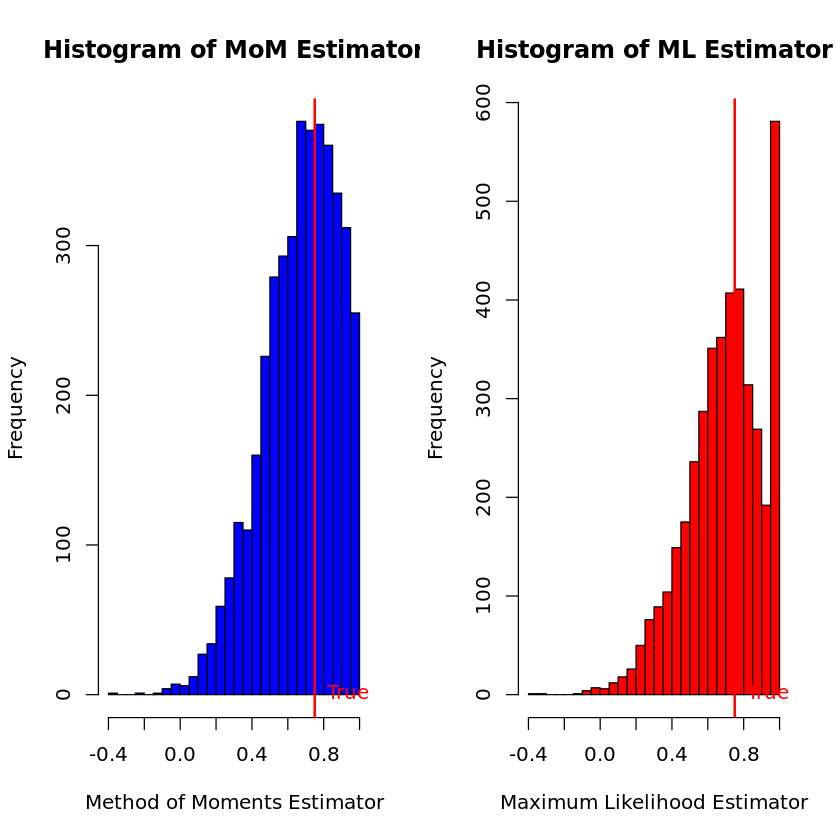

In [2]:
# Corrected simulation for part (f)
set.seed(123)
N <- 5000
n_muestra <- 35
alpha_real <- 0.75

# Function to sample from angular distribution f(x;alpha) = (1 + alpha*x)/2 for x in [-1,1]
r_angular <- function(n, alpha) {
  # Use rejection sampling instead of inverse transform
  samples <- numeric(n)
  for (i in 1:n) {
    accept <- FALSE
    while (!accept) {
      # Generate uniform on [-1, 1]
      x <- runif(1, -1, 1)
      # Accept with probability proportional to (1 + alpha*x)/2
      u <- runif(1, 0, 1)
      if (u <= (1 + alpha*x)/(1 + abs(alpha))) {
        samples[i] <- x
        accept <- TRUE
      }
    }
  }
  return(samples)
}

sim_alpha_tilde <- numeric(N)  # Method of moments estimator
sim_alpha_hat <- numeric(N)    # Maximum likelihood estimator

# Progress indicator
cat("Starting simulation...\n")
pb <- txtProgressBar(min = 0, max = N, style = 3)

for (i in 1:N) {
  # Generate sample from angular distribution
  muestra_sim <- r_angular(n_muestra, alpha_real)
  
  # Method of moments estimator: alpha_tilde = 3 * mean(x)
  sim_alpha_tilde[i] <- 3 * mean(muestra_sim)
  
  # Maximum likelihood estimator
  mle_obj <- function(alpha) {
    # Check bounds
    if (abs(alpha) >= 1) return(1e10)
    
    # Avoid numerical issues
    sum_log_terms <- 0
    for (x in muestra_sim) {
      term <- 1 + alpha * x
      if (term <= 0) return(1e10)  # Invalid value
      sum_log_terms <- sum_log_terms + log(term)
    }
    
    # Return negative log-likelihood
    return(-(sum_log_terms - n_muestra * log(2)))
  }
  
  # Use optimize with safe bounds
  resultado <- try(optimize(mle_obj, interval = c(-0.99, 0.99)), silent = TRUE)
  
  if (!inherits(resultado, "try-error")) {
    sim_alpha_hat[i] <- resultado$minimum
  } else {
    # Use a grid search as fallback
    alpha_vals <- seq(-0.95, 0.95, by = 0.05)
    lik_vals <- sapply(alpha_vals, mle_obj)
    best_idx <- which.min(lik_vals)
    sim_alpha_hat[i] <- alpha_vals[best_idx]
  }
  
  # Update progress bar
  setTxtProgressBar(pb, i)
}
close(pb)

# Remove any problematic values (outside theoretical range)
valid_indices <- !is.na(sim_alpha_tilde) & !is.na(sim_alpha_hat) & 
                abs(sim_alpha_tilde) <= 1 & abs(sim_alpha_hat) <= 1
sim_alpha_tilde <- sim_alpha_tilde[valid_indices]
sim_alpha_hat <- sim_alpha_hat[valid_indices]

# Print summary statistics
cat("\nSummary Statistics (after filtering):\n")
cat("Number of valid samples:", sum(valid_indices), "out of", N, "\n\n")

cat("Method of Moments Estimator (alpha_tilde):\n")
cat("Mean:", mean(sim_alpha_tilde), "\n")
cat("Variance:", var(sim_alpha_tilde), "\n")
cat("Theoretical Variance:", (3 - alpha_real^2)/n_muestra, "\n\n")

cat("Maximum Likelihood Estimator (alpha_hat):\n")
cat("Mean:", mean(sim_alpha_hat), "\n")
cat("Variance:", var(sim_alpha_hat), "\n\n")

# Calculate empirical relative efficiency
em_re <- var(sim_alpha_hat)/var(sim_alpha_tilde)
cat("Empirical Relative Efficiency:", em_re, "\n")

# Create histograms with ASCII-safe labels
par(mfrow = c(1, 2))
hist(sim_alpha_tilde, main = "Histogram of MoM Estimator", 
     xlab = "Method of Moments Estimator", col = "blue", breaks = 30)
abline(v = alpha_real, col = "red", lwd = 2)
text(alpha_real, 0, "True alpha", pos = 4, col = "red")

hist(sim_alpha_hat, main = "Histogram of ML Estimator", 
     xlab = "Maximum Likelihood Estimator", col = "red", breaks = 30)
abline(v = alpha_real, col = "red", lwd = 2)
text(alpha_real, 0, "True alpha", pos = 4, col = "red")